In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#df = pd.read_csv('../../data/telcom_numeric.csv')
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET'])
y = df['TARGET']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [4]:
random_forest = RandomForestClassifier(max_depth = 3, random_state = 1).fit(x_train, y_train)


In [5]:
x_test

,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
570153,570153,2018,2019,194.470005,209.166667,1,579.155000,3,2,0,199.575000,68.925,14.805,0.010,0.625,159.925,0.000,4760.264160,0.0
1030481,1030481,2016,2019,660.529964,664.283333,3,778.710000,3,1,0,778.101667,630.500,83.735,33.715,111.775,0.000,0.000,13992.359697,0.0
204211,204211,2010,2019,340.964161,481.666667,1,2661.966667,3,4,1,391.055000,458.000,47.165,22.975,8.970,2.700,0.000,15666.332031,0.0
1020482,1020482,2016,2019,263.990754,283.796667,2,2259.715000,4,5,0,275.563333,641.580,239.425,11.280,11.135,0.000,0.010,11716.216797,0.0
1033434,1033434,2016,2019,713.466574,661.746667,1,2064.835000,10,5,0,561.483333,289.935,354.815,17.510,134.915,0.000,0.000,14950.827637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208917,208917,2010,2019,1037.775275,1335.500000,3,1318.328333,0,1,0,1318.328333,544.905,32.660,37.825,93.815,249.790,82.540,15997.622559,0.0
820541,820541,2015,2019,331.696527,310.686667,1,2670.885000,2,3,0,291.840000,55.890,121.325,0.000,5.440,0.000,0.000,5572.104980,0.0
315734,315734,2014,2019,190.179914,197.166667,1,234.173333,3,2,0,185.911667,178.925,62.860,16.790,35.145,29.750,0.000,46.787109,0.0
963413,963413,2016,2019,956.666809,990.330000,2,1265.613333,1,1,4,915.403333,209.005,18.800,91.500,10.565,168.870,0.025,3166.144531,0.0


In [6]:
y_pred = random_forest.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
random_forest.score(x_test, y_test)

0.9952621593471529

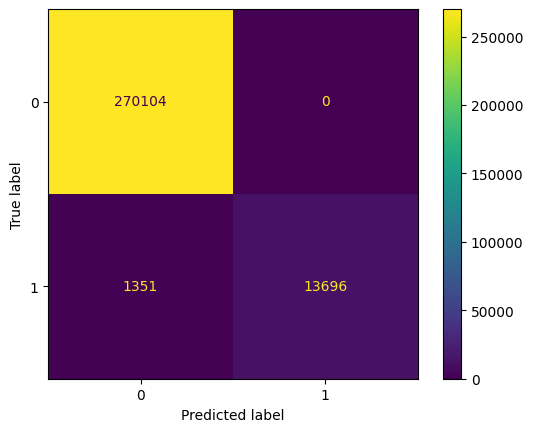

In [8]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [9]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(270104, 0, 1351, 13696)

In [10]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 1.0  Precission in true negatives (D): 0.9102146607297136


In [11]:
from joblib import dump, load
dump(random_forest, 'random_forest_churn.joblib')

['random_forest_churn.joblib']

In [12]:
#function to get all clients churn probability: 0 means no churn, 1 means churn
def getChurnProbabilities(random_forest, x):
    return random_forest.predict_proba(x)

In [13]:
proba_matrix = getChurnProbabilities(random_forest, x_test)

In [14]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,high):
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x_test.index[i]
        client_info = x_test.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(low, mid, high) list
        if client[1] <= low:
            clients_low.append(client_info)
        elif client[1] >= high:
            clients_high.append(client_info)
        else:
            #everything between lo and high percentages goes to mid chance list
            clients_mid.append(client_info)
        i += 1
    return clients_low, clients_mid, clients_high


In [15]:
clients_low, clients_mid, clients_high = showProbabilities(.30,.60)

In [16]:
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

270104  clients have low churn chances
14930  clients have mid churn chances
117  clients have high churn chances


In [17]:
#function to get each groups relevance in terms of bill amount by getting the sum of a determined group
def getClassificationSum(churn_group):
    names = x_test.columns.to_list()
    names[0] = "CUSTOMER_ID"
    names.append('CHURN_PERCENTAGE')
    clients_high_pd = pd.DataFrame(churn_group, columns = names)
    churn_bill_value = clients_high_pd['BILL_AMOUNT'].sum()
    return churn_bill_value

In [18]:
low_value = getClassificationSum(clients_low)
mid_value = getClassificationSum(clients_mid)
high_value = getClassificationSum(clients_high)

In [19]:
print("Bill amount for clients with low churn chances: ", low_value)
print("Bill amount for clients with mid churn chances: ", mid_value)
print("Bill amount for clients with high churn chances: ", high_value)

Bill amount for clients with low churn chances:  104599751.21089183
Bill amount for clients with mid churn chances:  4357886.30478707
Bill amount for clients with high churn chances:  2454.588149720983
